<a href="https://colab.research.google.com/github/Ivanbyone/DS-pet-projects/blob/main/dls_spring_sem_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Первая часть. Исследование

In [33]:
# В данной ячейке для удобства собираем все импортируемые модули
%matplotlib inline

import time
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

import warnings
warnings.filterwarnings('ignore')

## Загрузка данных (2 балла)

In [34]:
# Грузим данные с Гугл.Диска

! gdown --id 1K-tf97Hjklw_eHFxeup36bBpElSC1hrb
! gdown --id 1ZDlKZdX0arZLQfqu9qNy7Oh2BvdeE_1Z
! gdown --id 1FMEFDp-SBt5yxka5WAetGpDd7Ry_3szh

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1K-tf97Hjklw_eHFxeup36bBpElSC1hrb
To: /content/train.csv
100% 664k/664k [00:00<00:00, 94.8MB/s]
/usr/local/lib/python3.9/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1ZDlKZdX0arZLQfqu9qNy7Oh2BvdeE_1Z
To: /content/test.csv
100% 218k/218k [00:00<00:00, 96.3MB/s]
/usr/local/lib/python3.9/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1FMEFDp-

In [35]:
df = pd.read_csv('train.csv')
df.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [36]:
df.sample(10) # Задание: смотрим на случайные строки

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
4129,43,34.00,1505.35,Female,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,No,No,Month-to-month,No,Bank transfer (automatic),0
1431,15,68.60,1108.6,Male,0,Yes,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),0
3860,1,69.90,69.9,Male,0,Yes,Yes,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,1
1074,4,49.25,208.45,Male,0,No,No,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,No,Mailed check,0
2723,24,24.10,587.4,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),0
3054,51,111.50,5703.25,Female,0,No,No,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,0
1414,46,85.00,3969.4,Male,1,No,No,Yes,No,Fiber optic,Yes,No,No,No,No,Yes,Month-to-month,No,Electronic check,1
5069,16,54.55,825.1,Male,1,Yes,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),0
3584,3,69.55,222.3,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),1
2745,1,18.90,18.9,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0


In [37]:
df.info() # Смотрим на структуру данных датасета

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

После просмотра структуры данных видно, что столбец "TotalSpent" имеет тип данных object, а не float. Значит нам следует выяснить, какие данные следует заменить. 

In [38]:
df.isna().sum() # Проверяем на пропущенные значения

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

Отлично, пропущенных значений нет.

In [39]:
# Сразу преобразуем столбец "TotalSpent" и уберем дубликаты, если они есть

df = df.replace(['', ' '], np.nan)
df['TotalSpent'].fillna(df['TotalSpent'].median(), inplace=True)

df['TotalSpent'] = df['TotalSpent'].astype(float)

df = df.drop_duplicates()

In [40]:
df.shape # Смотрим как поменялась размерность датасета после первичной обработки

(5268, 20)

In [41]:
# выделяем числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# выделяем категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

# отдельно выделяем нашу целевую переменную
target_col = df['Churn']

Теперь можно переходить к анализу и визуализации данных.

## Анализ данных (3 балла)

0    3894
1    1374
Name: Churn, dtype: int64

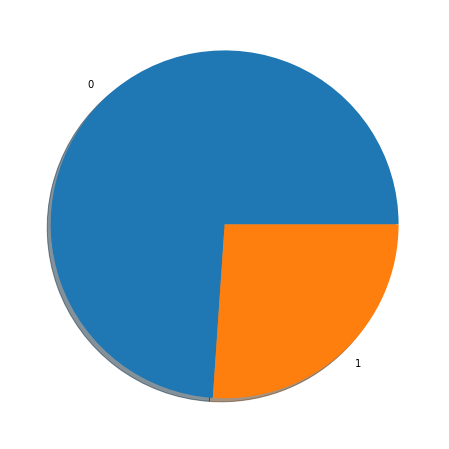

In [42]:
plt.figure(figsize=(8, 8)) # задаем размер графика
plt.pie(df['Churn'].value_counts(), labels=[0, 1], shadow=True) # строим круговую диаграмму
None
df['Churn'].value_counts() # смотрим количество значений каждого класса

Посмотрим на распределение классов целевой переменной при помощи круговой диаграммы. 
Мы видим, что классы имеют соотношение примерно 3:1, что говорит о том, что они несбалансированы.

Далее рассмотрим распределения числовых признаков.

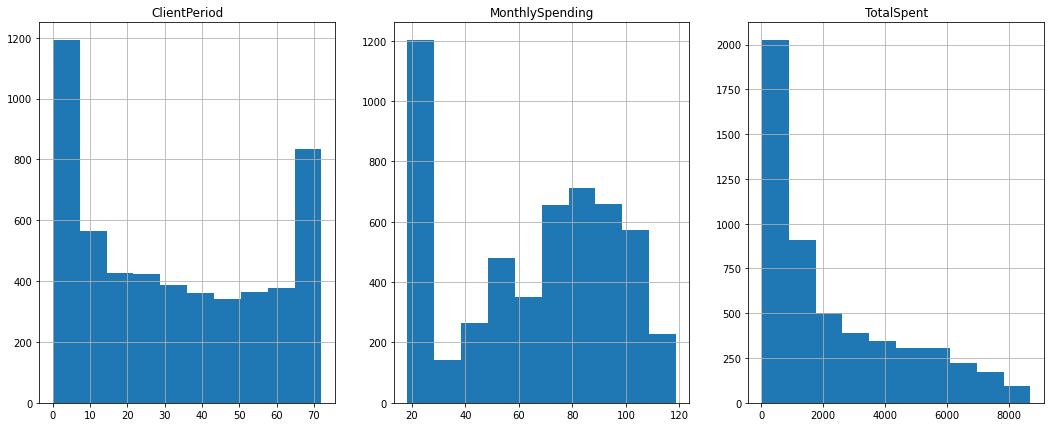

In [43]:
fig, axes = plt.subplots(1, 3, figsize=(18, 7)) # задаем параметры графика для количественных признаков

for i, col in enumerate(num_cols):
  df[col].hist(ax=axes[i])
  axes[i].set_title(col)

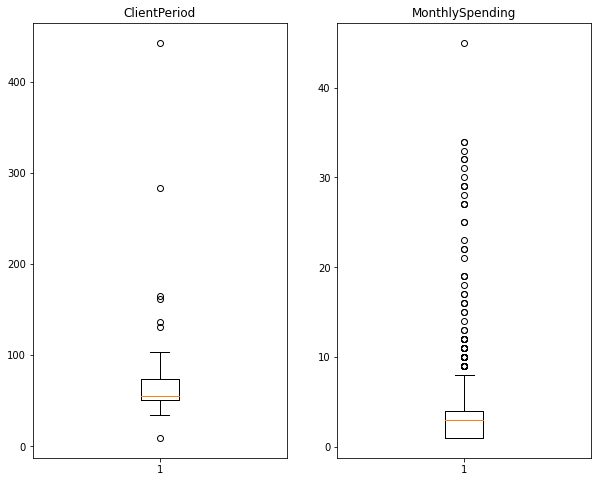

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(10, 8)) 
# построим боксплоты для двух численных признаков, предположу, что TotalSpent является производным от них признаком

for i, col in enumerate(num_cols[:2]):
  values = df.groupby(by=col).size()
  ax[i].boxplot(values)
  ax[i].set_title(col)

In [45]:
df[num_cols].corr() # посмотрим на корреляцию количественных признаков между собой

,ClientPeriod,MonthlySpending,TotalSpent
ClientPeriod,1.000000,0.248047,0.825375
MonthlySpending,0.248047,1.000000,0.651807
TotalSpent,0.825375,0.651807,1.000000


По числовым признакам можно сделать следующие выводы:
1. Частично есть выбросы 
2. Высокая корреляция между ClientPeriod, MonthlySpending и TotalSpent, т.е. признаки мультиколлинеарны (возможно TotalSpent является производным признаком от первых двух признаков)

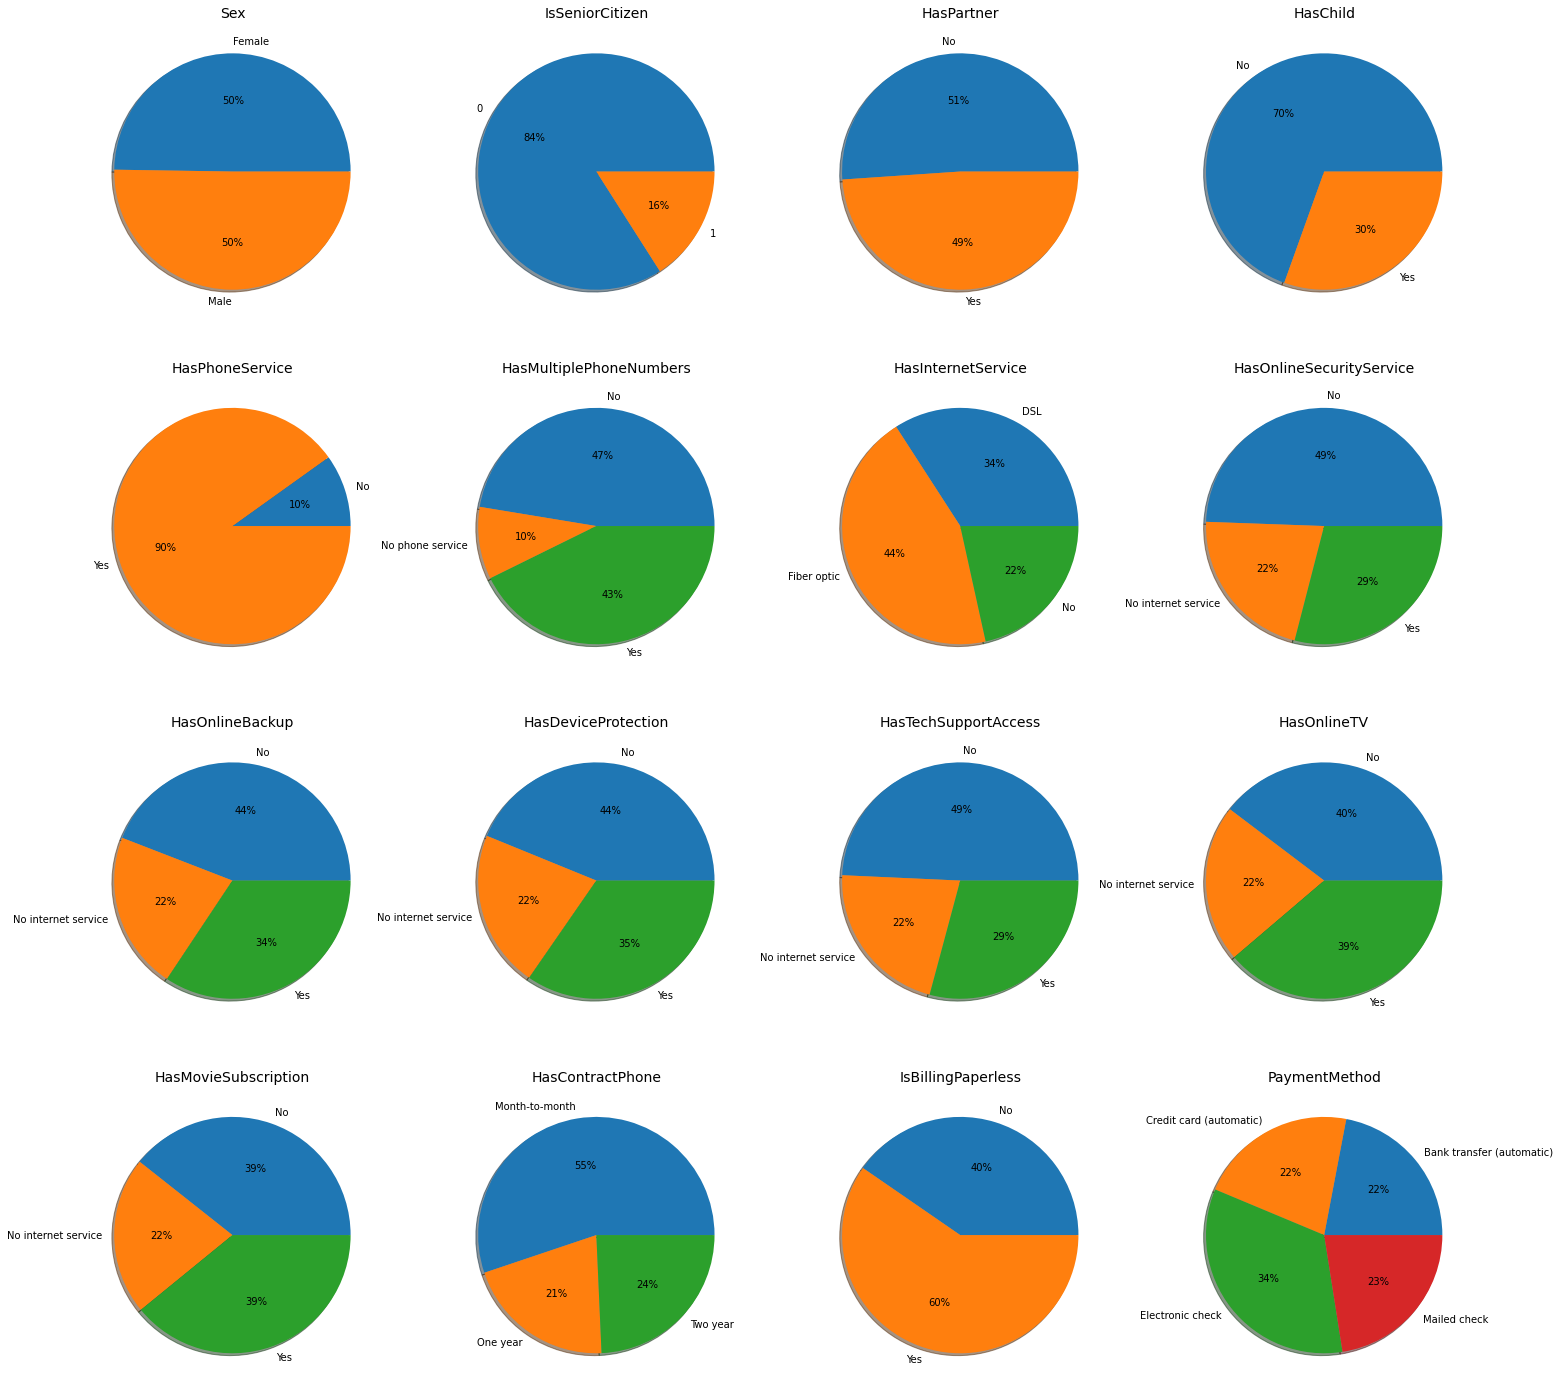

In [46]:
fig, ax = plt.subplots(4, 4, figsize=(25, 25))
ax = ax.flatten()

for i, col in enumerate(cat_cols):
  values = df.groupby(by=col).size()
  ax[i].pie(x = values, autopct='%.0f%%', labels=values.index, shadow=True)
  ax[i].set_title(col).set_fontsize(14)

In [47]:
def new_features(df):
  df.replace('No internet service', 'No', inplace=True) # заменим данные значения, поскольку они обозначают одно и то же

new_features(df)

In [48]:
outliers = df[(df['MonthlySpending'] > (df['MonthlySpending'].quantile(q=0.9))) | (df['MonthlySpending']<(df['MonthlySpending'].quantile(q=0.1)))].count(axis = 1)
outliers.sort_values(axis = 0, ascending=False, inplace=True) 

outliers = outliers.head(500)
df = df.drop(outliers.index) # убираем часть выбросов за пределами первого и девятого квантилей

In [49]:
y = df['Churn'] # поместим наш таргет в переменную y

Зададим метрику, по которой будем оценивать нашу модель.

In [50]:
def metric(y_true, y_pred): # создадим метрику в виде функции 
  m = roc_auc_score(y_true, y_pred)
  return m.round(5)

In [51]:
dummy_cats = pd.get_dummies(df[cat_cols]) # Делаем OneHotEncoding для категорильаных признаков

pre_data = pd.concat((df[num_cols], dummy_cats), axis=1) # объединяем новые категориальные признаки с числовыми

In [52]:
# делим выборку на учебную и валидационную
X_train, X_val, y_train, y_val = train_test_split(pre_data, y, 
                                                  test_size=0.2, 
                                                  random_state=42,
                                                  stratify=y)

In [53]:
scaler = StandardScaler() # задаем функцию стандартизации 
scaled = scaler.fit_transform(X_train[num_cols]) # стандартизируем обучающую часть
scaled_val = scaler.transform(X_val[num_cols]) # стандартизируем валидационную часть

X_train[num_cols] = scaled
X_val[num_cols] = scaled_val
pre_data.head()

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1,72,25.85,1872.2,0,0,1,0,1,1,0,...,0,0,0,1,1,0,0,1,0,0
2,1,75.90,75.9,0,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
3,32,79.30,2570.0,1,1,0,0,1,1,0,...,0,1,0,0,1,0,0,0,0,1
5,25,19.80,475.2,0,1,0,1,0,1,0,...,0,0,0,1,1,0,0,1,0,0
6,27,90.15,2423.4,0,1,0,0,1,1,0,...,1,1,0,0,1,0,1,0,0,0


# Применение линейных моделей (3 балла)

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline


model = make_pipeline(
    LogisticRegression()
)


params = {
    'logisticregression__C': [100, 10, 1, 0.1, 0.01, 0.001],
    'logisticregression__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'logisticregression__max_iter': [500, 1000]
}


grid = GridSearchCV(model, params, scoring='roc_auc', n_jobs=-1)


grid.fit(X_train, y_train)


print(grid.best_params_, grid.best_score_)

{'logisticregression__C': 10, 'logisticregression__max_iter': 500, 'logisticregression__solver': 'saga'} 0.8357625058168535


Лучший score 0.83576 для LogisticRegression с параметрами:
 
{'logisticregression__C': 10, 'logisticregression__max_iter': 500, 'logisticregression__solver': 'sag'} 

# Применение градиентного бустинга (2 балла)

In [55]:
import catboost

# создаем модель

boosting_model = catboost.CatBoostClassifier(n_estimators=284,
                                             eval_metric='AUC:hints=skip_train~false',
                                             silent=True,
                                             min_data_in_leaf=1,
                                             grow_policy='Lossguide',
                                             subsample=0.6983901315995189,
                                             l2_leaf_reg=3.180242242411711,
                                             eta=0.04356020658096416,
                                             random_strength=1.2423130425640145,
                                             random_seed=42,
                                             max_depth=4)


# параметры найдены при помощи фреймворка Optuna

boosting_model.fit(X_train, y_train)

pred_train = boosting_model.predict_proba(X_train)[:, 1]
pred = boosting_model.predict_proba(X_val)[:, 1]

print(metric(y_val, pred))

0.86589


Лучшее качество удалось получить с помощью Catboost (0.86589) с параметрами:

*   n_estimators=284,
*   eval_metric='AUC:hints=skip_train~false',
*   min_data_in_leaf=1,
*   Lgrow_policy='Lossguide',
*   subsample=0.6983901315995189,
*   l2_leaf_reg=3.180242242411711,
*   eta=0.04356020658096416,
*   random_strength=1.2423130425640145,
*   random_seed=42,
*   max_depth=4

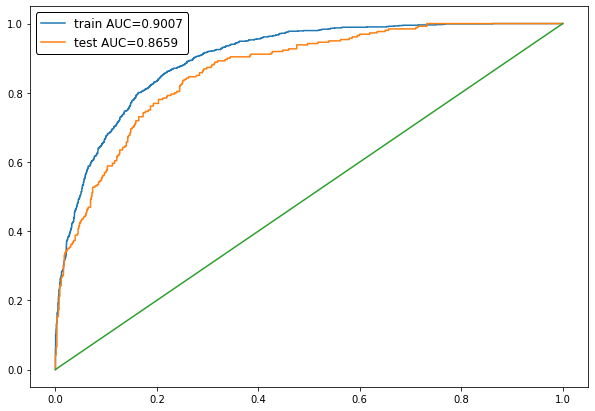

In [56]:
# посмотрим: нет ли переобучения или недообучения?!
from sklearn.metrics import roc_curve

auc_train = roc_auc_score(y_train, pred_train)
auc_val = roc_auc_score(y_val, pred)


plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, pred_train)[:2], label='train AUC={:.4f}'.format(auc_train))
plt.plot(*roc_curve(y_val, pred)[:2], label='test AUC={:.4f}'.format(auc_val))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

# Предсказания

In [57]:
df_test = pd.read_csv('test.csv')
df_test.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,42,56.10,2386.85,Male,0,Yes,No,Yes,Yes,DSL,Yes,No,No,No,No,No,One year,No,Credit card (automatic)
1,29,98.50,3004.15,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check
2,9,76.25,684.85,Male,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
3,67,74.00,4868.4,Female,0,Yes,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,Two year,No,Credit card (automatic)
4,71,20.10,1389.6,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic)


In [58]:
df_test.replace('No internet service', 'No', inplace=True)


df_test = df_test.replace(['', ' '], np.nan)


df_test['TotalSpent'] = df_test['TotalSpent'].astype(float)

df_test['TotalSpent'].fillna(df_test['TotalSpent'].median(), inplace=True)

In [59]:
dummy_cats = pd.get_dummies(df_test[cat_cols])


scaled = scaler.transform(df_test[num_cols])

df_test[num_cols] = scaled

pre_test_data = pd.concat((df_test[num_cols], dummy_cats), axis=1)

pre_test_data.head()

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.450218,-0.318285,0.100536,0,0,1,0,1,1,0,...,0,0,1,0,1,0,0,1,0,0
1,-0.087977,1.178559,0.390402,1,0,1,0,1,1,0,...,1,1,0,0,0,1,0,0,1,0
2,-0.915969,0.393069,-0.698672,0,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
3,1.485209,0.313637,1.265798,0,1,0,0,1,0,1,...,0,0,0,1,1,0,0,1,0,0
4,1.650807,-1.589191,-0.367742,0,1,0,0,1,0,1,...,0,0,0,1,1,0,1,0,0,0


In [60]:
pred = boosting_model.predict_proba(pre_test_data)[:,1]

In [61]:
sub = pd.read_csv('submission.csv')
sub.head()

,Id,Churn
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [62]:
sub['Churn'] = pred
sub.to_csv('submission.csv', index=False)

Одно из лучших мои решений для Лидерборда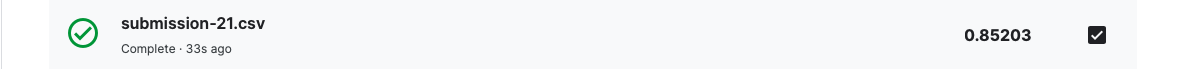